<a href="https://colab.research.google.com/github/Meharvir/Forever-Lost-Website/blob/main/PART_I_Comprehensive_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: EDA

## Part I: Comprehensive Colab Notebook

1. Initial EDA with Pandas

In [ ]:
import pandas as pd

# Loading Dataset
df = pd.read_csv('cleaned_dataset.csv')

print(df.head())

print(df.describe())

# Identify and handle missing values
print(df.isnull().sum())
df = df.dropna()

# Check and remove duplicates
df = df.drop_duplicates()
print(f"Number of duplicates: {df.duplicated().sum()}")


        review_id  product_id  \
0   RUE030N50F9EJ  B09PYVXXW5   
1  R385JSD6KWP2QU  B09PYVXXW5   
2  R1UB1V4EPP9MN3  B09PYVXXW5   
3   RWYK1GXIVV6H1  B09PYVXXW5   
4  R3FBQBGQM3II4W  B09PYVXXW5   

                                               title    author  rating  \
0  5.0 out of 5 stars Really good with a couple o...       CTM       5   
1  4.0 out of 5 stars I wish I could rate 5 stars...    Gianna       4   
2  5.0 out of 5 stars Basically perfect, fantasti...  Colin M.       5   
3            1.0 out of 5 stars Decent but Defective    Aquila       1   
4   3.0 out of 5 stars I went with soundcore instead   Frankie       3   

                                             content  timestamp  \
0  I love TWS earbuds. I have many including buds...        NaN   
1  …I just can’t. Because as useful as these earb...        NaN   
2  I needed a replacement for my Galaxy buds pro'...        NaN   
3  UPDATE 6/24/22: As of 6/23/22, my replacement ...        NaN   
4  So out of the box 

 2. Data Visualization

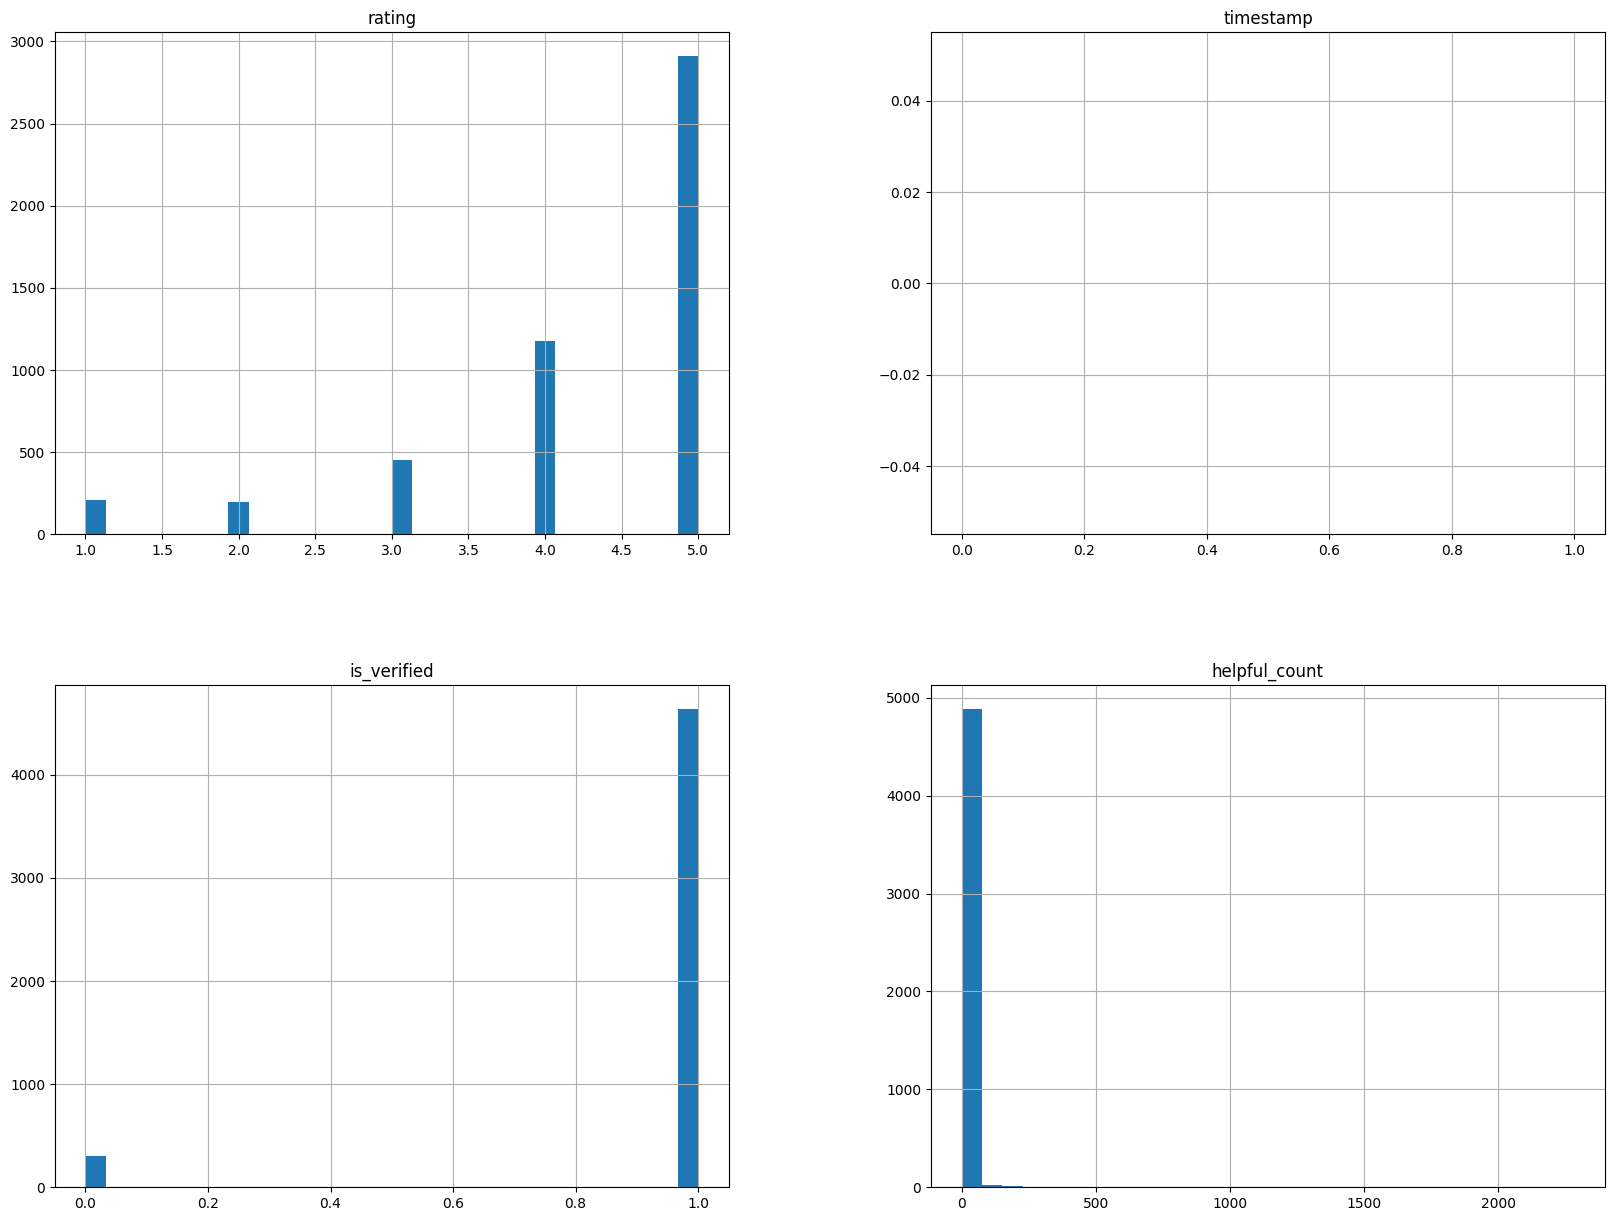

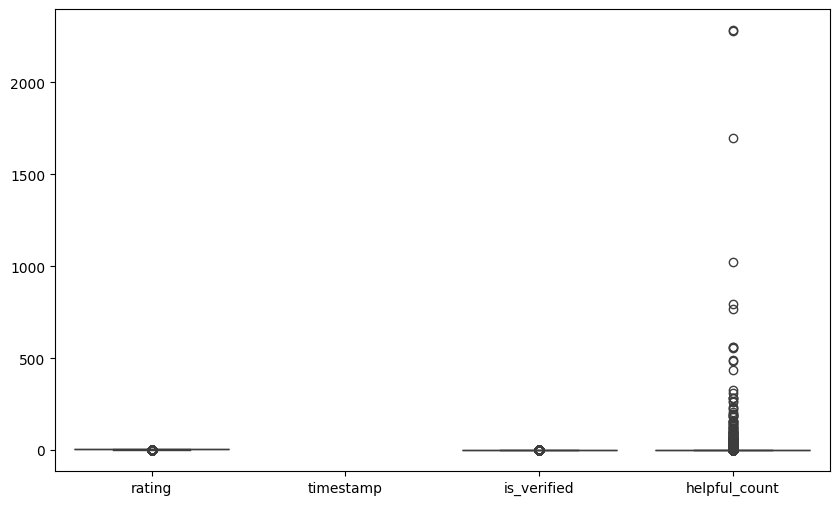

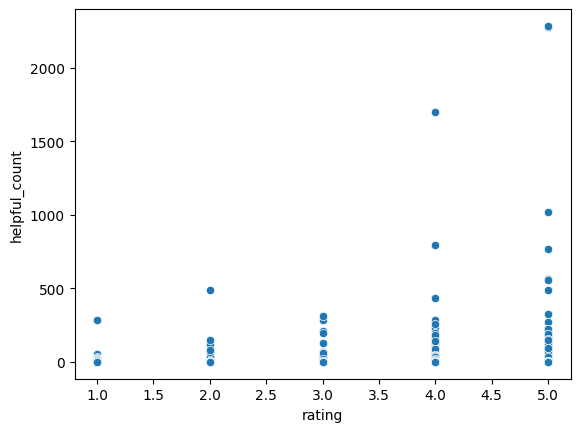

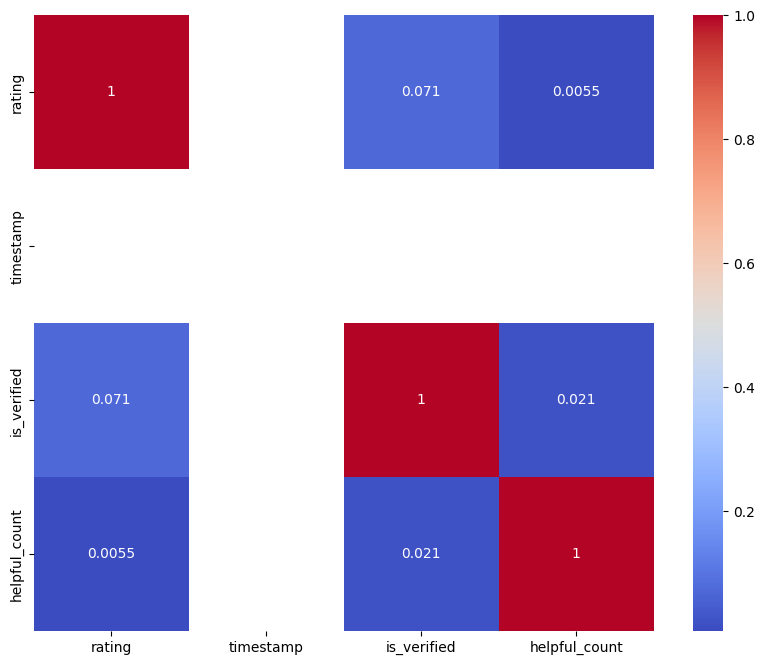

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_dataset.csv')
# Histogram
df.hist(bins=30, figsize=(20,15))
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.show()

# Scatter plot
sns.scatterplot(x='rating', y='helpful_count', data=df)
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()


3. Correlation Analysis

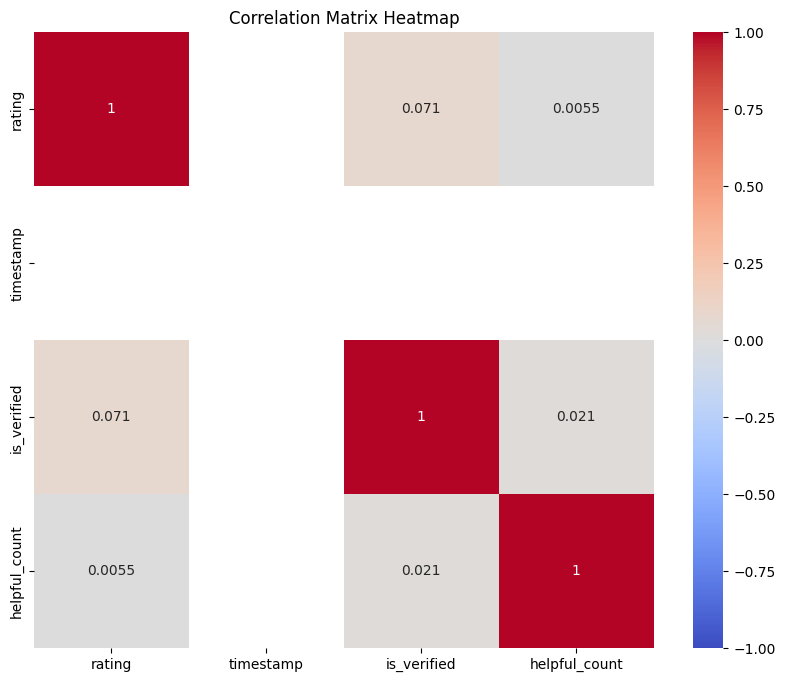

                 rating  timestamp  is_verified  helpful_count
rating         1.000000        NaN     0.070521       0.005550
timestamp           NaN        NaN          NaN            NaN
is_verified    0.070521        NaN     1.000000       0.020697
helpful_count  0.005550        NaN     0.020697       1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_df = df.select_dtypes(include=['number'])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Using Heatmape to Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Printing out the results
print(correlation_matrix)

4. Sentiment Analysis using TextBlob

In [ ]:
from textblob import TextBlob

# Classify
def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply
df['sentiment'] = df['content'].apply(get_sentiment)

# Sentiment counts
print(df['sentiment'].value_counts())

df['polarity'] = df['content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Aggregate sentiment scores
average_polarity = df['polarity'].mean()
print(f"Average Polarity: {average_polarity}")


sentiment
positive    4371
neutral      350
negative     224
Name: count, dtype: int64
Average Polarity: 0.2719467003892631


5. Conclusion

Insights:
Based on the sentiment analysis of the reviews:

Positive Reviews: The majority of reviews (4,371) were positive. This indicates that, overall, customers are satisfied with their products.
Neutral Reviews: There were 350 neutral reviews, meaning that a small percentage of customers had neither an exceptionally good nor a poor experience with the products.
Negative Reviews: A few reviews (224) were negative, pointing to a minority of customers who had unsatisfactory experiences.
Average Sentiment Score:
The average polarity score of 0.272 reflects a generally positive sentiment overall. This score indicates that, on average, the reviews express a mild positive sentiment. While most feedback is favorable, the average score suggests there are areas where improvement could be beneficial.

Implications:
Overall Customer Satisfaction:

The high volume of positive reviews strongly indicates overall customer satisfaction. Most customers are pleased with the product or service.
Areas for Improvement:

The presence of neutral and negative reviews highlights that not all experiences are positive. Addressing the issues raised in negative reviews and understanding why some customers are neutral can help improve the product or service.
Business Strategy:

Leverage Positive Feedback: Utilize positive reviews in marketing campaigns to highlight strengths and attract new customers.
Address Concerns: Focus on the concerns mentioned in negative reviews to enhance product quality and customer satisfaction.
Next Steps:
Visualize Data:

Create visualizations of sentiment distribution to clearly communicate findings and trends. This can include pie charts, bar graphs, or sentiment over time.
Analyze Feedback:

Perform a deeper analysis of the content of negative and neutral reviews to identify specific areas for improvement. Look for common themes or recurring issues.
Monitor Trends:

Continue monitoring sentiment over time to track changes and measure the impact of improvements made. This will help in understanding the effectiveness of any actions taken.

## Extra






1. Calculate Correlation

In [ ]:
def calculate_correlation(df, var1, var2):
    if var1 not in df.columns or var2 not in df.columns:
        raise ValueError(f"One or both columns '{var1}' and '{var2}' are not in the DataFrame")
    df_clean = df[[var1, var2]].dropna()
    return df_clean[var1].corr(df_clean[var2])
correlation = calculate_correlation(df, 'rating', 'helpful_count')
print(f"Correlation between 'rating' and 'helpful_count': {correlation}")


Correlation between 'rating' and 'helpful_count': 0.00554995505271465


2. Calculate Skewness and Kurtosis

In [ ]:
def calculate_skewness_kurtosis(df, var):
    if var not in df.columns:
        raise ValueError(f"Column '{var}' is not in the DataFrame")
    df_clean = df[var].dropna()
    skewness = df_clean.skew()
    kurtosis = df_clean.kurtosis()
    return skewness, kurtosis
skewness, kurtosis = calculate_skewness_kurtosis(df, 'rating')
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Skewness: -1.6340913578140948, Kurtosis: 2.0114702597320604


3. Sentiment Analysis Summary

In [ ]:
def sentiment_analysis_summary(df, text_column):
    if text_column not in df.columns:
        raise ValueError(f"Column '{text_column}' is not in the DataFrame")
    df_clean = df[[text_column]].dropna()
    df_clean['sentiment'] = df_clean[text_column].apply(get_sentiment)
    return df_clean['sentiment'].value_counts()
sentiment_counts = sentiment_analysis_summary(df, 'content')
print(sentiment_counts)


sentiment
positive    4371
neutral      350
negative     224
Name: count, dtype: int64
